### Task : Mask detection from images and videos 



- Libraries Used
-------------------------
         1 . Opencv
         2 . Pytorch
         3 . Darknet FrameWork
         4 . Yolo V4
         5 . Numpy
         6 . Pandas
         7 . matplotlib
        

### Maks Object Detection YOLO V4

In [1]:
import os 
import shutil

In [2]:
import cv2

In [3]:
net_v4 = cv2.dnn.readNetFromDarknet('obj.cfg','obj_60000.weights')

In [4]:
classes = []
with open("classes.names",'r') as f:
    classes = [i.strip() for i in f.readlines()]

In [5]:
classes

['car',
 'truck',
 'bus',
 'motorcycle',
 'auto',
 'carLP',
 'truckLP',
 'busLP',
 'motorcycleLP',
 'autoLP']

In [6]:
img1 = cv2.imread("data\\6.jpg")

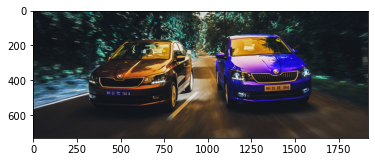

In [7]:
import matplotlib.pyplot as plt
plt.imshow(img1)

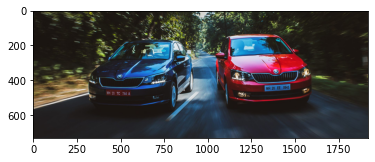

In [8]:
plt.imshow(img1[:,:,::-1])

In [30]:
ht,wt, _ = img1.shape

In [31]:
blob = cv2.dnn.blobFromImage(img1,1/255,(416,416),(0,0,0),swapRB = True , crop = False)

In [32]:
net_v4.setInput(blob)

In [33]:
last_layer = net_v4.getUnconnectedOutLayersNames()

In [34]:
layer_out = net_v4.forward(last_layer)

In [35]:
layer_out[0][0]

array([5.42119183e-02, 5.42691946e-02, 2.20805675e-01, 1.03280775e-01,
       1.40717766e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00], dtype=float32)

In [36]:
import numpy as np

In [38]:

boxes = []
confidences = []
class_ids = []

for i in layer_out:
    for j in i:
        score = j[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > .6:
            center_x = int(j[0] * wt)
            print(" X cordinated for highest label probability image = ",center_x)
            center_y = int(j[1] * ht)
            print(" Y cordinated for highest label probability image = ",center_y)
            w = int(j[2] * wt)
            h = int(j[3] * ht)
            x = int(center_x - w / 2)
            y = int(center_y - h/2)
            boxes.append([x , y , w , h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)





 X cordinated for highest label probability image =  1300
 Y cordinated for highest label probability image =  316
 X cordinated for highest label probability image =  1400
 Y cordinated for highest label probability image =  443
 X cordinated for highest label probability image =  1410
 Y cordinated for highest label probability image =  443
 X cordinated for highest label probability image =  497
 Y cordinated for highest label probability image =  470


In [39]:
indexces = cv2.dnn.NMSBoxes(boxes , confidences , .5 , .6)

In [40]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size = (len(boxes) , 3))


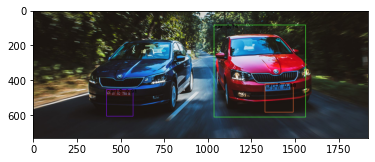

In [41]:
for k in indexces.flatten():
    x,y,w,h = boxes[k]
    label = str(classes[class_ids[k]])
    confidence = str(round(confidences[k],2))
    color = colors[k]
    cv2.rectangle(img1,(x , y) , (x+w , y+w),color,2)
    cv2.putText(img1,label+" "+confidence,(x,y+20),font,2,(0,0,0),2)

#cv2.imshow("img",img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.imshow(img1[:,:,::-1])

### YOLO V4 For Web Cam 

In [6]:
import numpy as np


In [7]:
cap = cv2.VideoCapture(0)

while 1:
    _, img = cap.read()
    img = cv2.resize(img,(1280,720))
    hight,width,_ = img.shape
    blob = cv2.dnn.blobFromImage(img, 1/255,(416,416),(0,0,0),swapRB = True,crop= False)

    net_v4.setInput(blob)

    output_layers_name = net_v4.getUnconnectedOutLayersNames()

    layerOutputs = net_v4.forward(output_layers_name)

    boxes =[]
    confidences = []
    class_ids = []

    for output in layerOutputs:
        for detection in output:
            score = detection[5:]
            class_id = np.argmax(score)
            confidence = score[class_id]
            if confidence > 0.7:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * hight)
                w = int(detection[2] * width)
                h = int(detection[3]* hight)
                x = int(center_x - w/2)
                y = int(center_y - h/2)
                boxes.append([x,y,w,h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)


    indexes = cv2.dnn.NMSBoxes(boxes,confidences,.5,.4)

    boxes =[]
    confidences = []
    class_ids = []

    for output in layerOutputs:
        for detection in output:
            score = detection[5:]
            class_id = np.argmax(score)
            confidence = score[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * hight)
                w = int(detection[2] * width)
                h = int(detection[3]* hight)

                x = int(center_x - w/2)
                y = int(center_y - h/2)



                boxes.append([x,y,w,h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes,confidences,.8,.4)
    font = cv2.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0,255,size =(len(boxes),3))
    if  len(indexes)>0:
        for i in indexes.flatten():
            x,y,w,h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i],2))
            color = colors[i]
            cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
            cv2.putText(img,label + " " + confidence, (x,y+400),font,2,color,2)
            
    cv2.imshow("video",img)
    if cv2.waitKey(1) == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

### Object detection for videos 

In [7]:
cap = cv2.VideoCapture('data/test8.webm')

while 1:
    _, img = cap.read()
    img = cv2.resize(img,(1280,720))
    hight,width,_ = img.shape
    blob = cv2.dnn.blobFromImage(img, 1/255,(416,416),(0,0,0),swapRB = True,crop= False)

    net_v4.setInput(blob)

    output_layers_name = net_v4.getUnconnectedOutLayersNames()

    layerOutputs = net_v4.forward(output_layers_name)

    boxes =[]
    confidences = []
    class_ids = []

    for output in layerOutputs:
        for detection in output:
            score = detection[5:]
            class_id = np.argmax(score)
            confidence = score[class_id]
            if confidence > 0.7:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * hight)
                w = int(detection[2] * width)
                h = int(detection[3]* hight)
                x = int(center_x - w/2)
                y = int(center_y - h/2)
                boxes.append([x,y,w,h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)


    indexes = cv2.dnn.NMSBoxes(boxes,confidences,.5,.4)

    boxes =[]
    confidences = []
    class_ids = []

    for output in layerOutputs:
        for detection in output:
            score = detection[5:]
            class_id = np.argmax(score)
            confidence = score[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * hight)
                w = int(detection[2] * width)
                h = int(detection[3]* hight)

                x = int(center_x - w/2)
                y = int(center_y - h/2)



                boxes.append([x,y,w,h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes,confidences,.8,.4)
    font = cv2.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0,255,size =(len(boxes),3))
    if  len(indexes)>0:
        for i in indexes.flatten():
            x,y,w,h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i],2))
            color = colors[i]
            cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
            cv2.putText(img,label + " " + confidence, (x,y+150),font,2,color,2)
            
    cv2.imshow("video",img)
    if cv2.waitKey(1) == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
